In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
data = pd.read_csv('Bank_Transaction_Fraud_Detection.csv')

In [5]:
import warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [6]:
data.head()

,Customer_ID,Customer_Name,Gender,Age,State,City,Bank_Branch,Account_Type,Transaction_ID,Transaction_Date,...,Merchant_Category,Account_Balance,Transaction_Device,Transaction_Location,Device_Type,Is_Fraud,Transaction_Currency,Customer_Contact,Transaction_Description,Customer_Email
0,d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e,Osha Tella,Male,60,Kerala,Thiruvananthapuram,Thiruvananthapuram Branch,Savings,4fa3208f-9e23-42dc-b330-844829d0c12c,23-01-2025,...,Restaurant,74557.27,Voice Assistant,"Thiruvananthapuram, Kerala",POS,0,INR,+9198579XXXXXX,Bitcoin transaction,oshaXXXXX@XXXXX.com
1,7c14ad51-781a-4db9-b7bd-67439c175262,Hredhaan Khosla,Female,51,Maharashtra,Nashik,Nashik Branch,Business,c9de0c06-2c4c-40a9-97ed-3c7b8f97c79c,11-01-2025,...,Restaurant,74622.66,POS Mobile Device,"Nashik, Maharashtra",Desktop,0,INR,+9191074XXXXXX,Grocery delivery,hredhaanXXXX@XXXXXX.com
2,3a73a0e5-d4da-45aa-85f3-528413900a35,Ekani Nazareth,Male,20,Bihar,Bhagalpur,Bhagalpur Branch,Savings,e41c55f9-c016-4ff3-872b-cae72467c75c,25-01-2025,...,Groceries,66817.99,ATM,"Bhagalpur, Bihar",Desktop,0,INR,+9197745XXXXXX,Mutual fund investment,ekaniXXX@XXXXXX.com
3,7902f4ef-9050-4a79-857d-9c2ea3181940,Yamini Ramachandran,Female,57,Tamil Nadu,Chennai,Chennai Branch,Business,7f7ee11b-ff2c-45a3-802a-49bc47c02ecb,19-01-2025,...,Entertainment,58177.08,POS Mobile App,"Chennai, Tamil Nadu",Mobile,0,INR,+9195889XXXXXX,Food delivery,yaminiXXXXX@XXXXXXX.com
4,3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9,Kritika Rege,Female,43,Punjab,Amritsar,Amritsar Branch,Savings,f8e6ac6f-81a1-4985-bf12-f60967d852ef,30-01-2025,...,Entertainment,16108.56,Virtual Card,"Amritsar, Punjab",Mobile,0,INR,+9195316XXXXXX,Debt repayment,kritikaXXXX@XXXXXX.com


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 24 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Customer_ID              200000 non-null  object 
 1   Customer_Name            200000 non-null  object 
 2   Gender                   200000 non-null  object 
 3   Age                      200000 non-null  int64  
 4   State                    200000 non-null  object 
 5   City                     200000 non-null  object 
 6   Bank_Branch              200000 non-null  object 
 7   Account_Type             200000 non-null  object 
 8   Transaction_ID           200000 non-null  object 
 9   Transaction_Date         200000 non-null  object 
 10  Transaction_Time         200000 non-null  object 
 11  Transaction_Amount       200000 non-null  float64
 12  Merchant_ID              200000 non-null  object 
 13  Transaction_Type         200000 non-null  object 
 14  Merc

In [8]:
data.shape

(200000, 24)

In [9]:
data.describe

<bound method NDFrame.describe of                                  Customer_ID        Customer_Name  Gender  \
0       d5f6ec07-d69e-4f47-b9b4-7c58ff17c19e           Osha Tella    Male   
1       7c14ad51-781a-4db9-b7bd-67439c175262      Hredhaan Khosla  Female   
2       3a73a0e5-d4da-45aa-85f3-528413900a35       Ekani Nazareth    Male   
3       7902f4ef-9050-4a79-857d-9c2ea3181940  Yamini Ramachandran  Female   
4       3a4bba70-d9a9-4c5f-8b92-1735fd8c19e9         Kritika Rege  Female   
...                                      ...                  ...     ...   
199995  b8bdae19-296f-48b7-9104-e055d33a09ac        Vedhika Magar  Female   
199996  635bc099-8a93-48ee-829a-bf2283fe8fda            Aashi Pai    Male   
199997  c1b31cc2-0905-47e8-8cc5-6461d1f3ba33          Dayita Shan  Female   
199998  32bb8e66-f3fa-43bf-8242-dab9a6116310          Unnati Vyas  Female   
199999  f3dd92ef-b17a-45d2-b6cb-fdbee20843fe           Gopal Rout    Male   

        Age                              

# Data Preprocessing

## Step 1: Drop Unnecessary Columns


In [10]:
data = data.drop(columns=['Customer_Contact', 'Customer_Email', 'Customer_Name', 'Customer_ID', 'Transaction_ID', 'Merchant_ID'])

In [11]:
data.shape

(200000, 18)

In [12]:
data.isnull().sum()

Gender                     0
Age                        0
State                      0
City                       0
Bank_Branch                0
Account_Type               0
Transaction_Date           0
Transaction_Time           0
Transaction_Amount         0
Transaction_Type           0
Merchant_Category          0
Account_Balance            0
Transaction_Device         0
Transaction_Location       0
Device_Type                0
Is_Fraud                   0
Transaction_Currency       0
Transaction_Description    0
dtype: int64

## Step 2: Handle Missing Values


In [13]:
data = data.dropna()

## Step 3: Encode Categorical Features


In [14]:
categorical_columns = data.select_dtypes(include=['object']).columns

In [15]:
encoder = LabelEncoder()
for col in categorical_columns :
    data[col] = encoder.fit_transform(data[col])                

## Step 4: Scale Numerical Features


In [16]:
scaler = StandardScaler()
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

## Step 5: Train-Test Split


In [17]:
data['Is_Fraud'] = data['Is_Fraud'].astype(int)

In [18]:
X = data.drop(columns= ['Is_Fraud'])
y = data['Is_Fraud']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning

## Logistic Regression

In [20]:
param_grid_lr = {'C': [0.01, 0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid_lr = GridSearchCV(LogisticRegression(), param_grid_lr, cv=5, scoring='accuracy')
grid_lr.fit(X_train, y_train)
best_lr = grid_lr.best_estimator_

In [21]:
import pickle

In [22]:
with open('fraud_model.pkl', 'wb') as f:
    pickle.dump({'model': best_lr, 'encoders': encoder}, f)

## Decision Tree

In [23]:
param_grid_dt = {'max_depth': [3, 5, 10, None], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

## Random Forest 

In [32]:
param_grid_rf = {'n_estimators': [50, 100, 200], 'max_depth': [5, 10, None], 'min_samples_split': [2, 5, 10]}
random_rf = RandomizedSearchCV(RandomForestClassifier(), param_grid_rf, cv=5, scoring='accuracy', n_iter=5, random_state=42)
random_rf.fit(X_train, y_train)
best_rf = random_rf.best_estimator_

# Model Evaluation

In [26]:
models = {
    "Logistic Regression": best_lr,
    "Decision Tree": best_dt,
    # "Random Forest": best_rf,
}

In [27]:
accuracies = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    print(f" {name} Classification Report:\n", classification_report(y_test, y_pred))

 Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           4       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000

 Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97     37955
           4       0.00      0.00      0.00      2045

    accuracy                           0.95     40000
   macro avg       0.47      0.50      0.49     40000
weighted avg       0.90      0.95      0.92     40000



# Model Comparison 

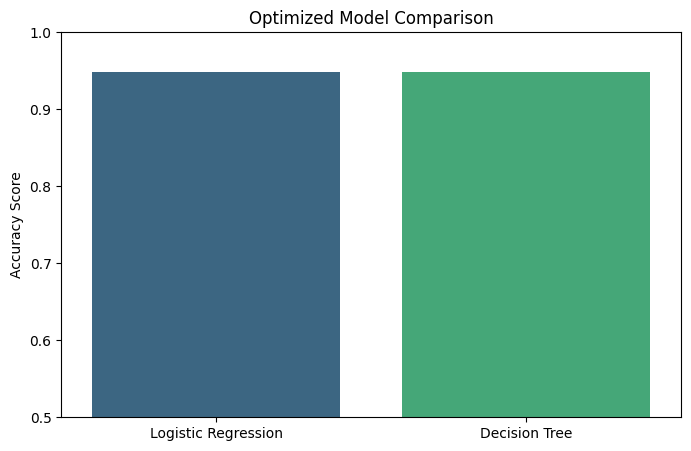

In [28]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette="viridis")
plt.ylabel("Accuracy Score")
plt.title("Optimized Model Comparison")
plt.ylim(0.5, 1)
plt.show()

In [29]:
import joblib

In [31]:
joblib.dump(best_lr, 'logistic_regression.pkl')

['logistic_regression.pkl']

In [33]:
import skl2onnx
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

# Example: trained sklearn model
initial_type = [('float_input', FloatTensorType([None, X.shape[1]]))]
onnx_model = convert_sklearn(best_dt, initial_types=initial_type)

# Save ONNX model
with open("logistic.onnx", "wb") as f:
    f.write(onnx_model.SerializeToString()) # type: ignore


In [1]:
import onnx
from onnx_tf.backend import prepare

onnx_model = onnx.load("logistic.onnx")
tf_rep = prepare(onnx_model)
tf_rep.export_graph("tf_model")  

In [3]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_saved_model("model.onnx")
tflite_model = converter.convert()

# Save TFLite model
with open("model.tflite", "wb") as f:
    f.write(tflite_model)
